#### Problem Statement :- 
    Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months. Perform following steps: 
       1. Read the dataset. 
       2. Distinguish the feature and target set and divide the data set into training and test sets. 
       3. Normalize the train and test data. 
       4. Initialize and build the model. Identify the points of improvement and implement the same. 
       5. Print the accuracy score and confusion matrix (5 points).
       
Dataset link : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling 

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [8]:
df = pd.read_csv('Churn_Modelling.csv')

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace = True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### VISUALIZATION

In [19]:
def viz(x,y,xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()
    

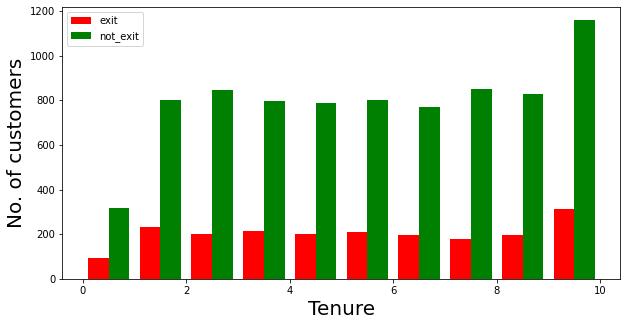

In [20]:
churn_exited = df[df['Exited']==1]['Tenure']
churn_not_exited = df[df['Exited']==0]['Tenure']

viz(churn_exited,churn_not_exited,"Tenure")

In [21]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']

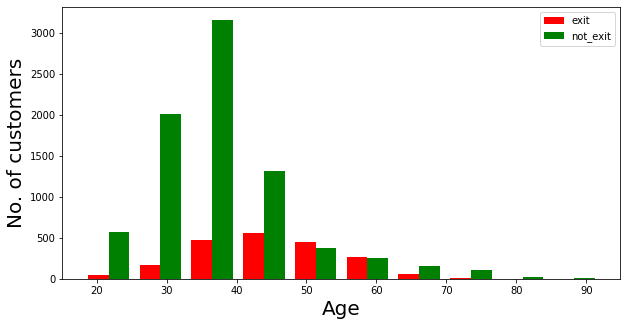

In [23]:
viz(df_churn_exited2, df_churn_not_exited2, "Age")

### CONVERTING CATEGORICAL VARIABLES

In [29]:
states = pd.get_dummies(df['Geography'],drop_first=True)
gender = pd.get_dummies(df['Gender'],drop_first=True)

df = pd.concat([df,states,gender], axis = 1)

In [30]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0,0,1,0


In [31]:
df.drop(columns=['Gender','Geography'],inplace=True)

In [33]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,0,1,0


In [34]:
x = df.drop(columns=['Exited'])
y = df['Exited']

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,stratify=y)


# Normalizing the values with mean as 0 and Standard Deviation as 1

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [38]:
x_train  = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [39]:
x_train

array([[-4.77446146e-01, -6.63192698e-01,  7.02885560e-01, ...,
        -5.78230042e-01, -5.75370777e-01, -1.09318135e+00],
       [-2.55775245e-02, -1.87766271e-01,  7.02885560e-01, ...,
        -5.78230042e-01, -5.75370777e-01, -1.09318135e+00],
       [-9.39584509e-01,  2.66479229e+00,  1.39724047e+00, ...,
        -5.78230042e-01,  1.73800972e+00,  9.14761305e-01],
       ...,
       [ 9.29508425e-01, -1.70913084e+00,  1.39724047e+00, ...,
        -5.78230042e-01, -5.75370777e-01, -1.09318135e+00],
       [ 1.23760067e+00, -9.26809860e-02,  8.53064609e-03, ...,
         1.72941551e+00, -5.75370777e-01, -1.09318135e+00],
       [ 3.95481873e-01,  2.40429936e-03,  7.02885560e-01, ...,
        -5.78230042e-01, -5.75370777e-01,  9.14761305e-01]])

In [40]:
x_test

array([[ 0.32359368, -0.37793684, -1.03300173, ...,  1.72941551,
        -0.57537078, -1.09318135],
       [ 0.96031765,  0.38274544,  1.74441793, ..., -0.57823004,
        -0.57537078, -1.09318135],
       [-0.01530778, -0.6631927 ,  0.70288556, ..., -0.57823004,
         1.73800972, -1.09318135],
       ...,
       [-0.52879485, -0.28285156, -0.68582427, ...,  1.72941551,
        -0.57537078,  0.9147613 ],
       [-0.43636718,  2.28445115, -0.68582427, ..., -0.57823004,
         1.73800972, -1.09318135],
       [-0.70338046, -0.56810741,  0.3557081 , ..., -0.57823004,
         1.73800972,  0.9147613 ]])

### ANN MODEL

In [47]:
x.shape

(10000, 14)

In [41]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#To add the layers
#Dense helps to contruct the neurons
#Input Dimension means we have 11 features 
# Units is to create the hidden layers
#Uniform helps to distribute the weight uniformly

In [48]:
model = keras.Sequential([
    keras.layers.Dense(activation='relu',input_dim = 14,units = 6,kernel_initializer = 'uniform'),
    keras.layers.Dense(activation='relu',units = 6, kernel_initializer = 'uniform'),
    keras.layers.Dense(activation='sigmoid',units = 1, kernel_initializer = 'uniform')
    
])

In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 90        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(x_train,y_train,batch_size=10,epochs=50)

Epoch 1/50
700/700 [==============================] - 4s 6ms/step - loss: 0.4433 - accuracy: 0.7963
Epoch 2/50
700/700 [==============================] - 4s 6ms/step - loss: 0.4332 - accuracy: 0.7963
Epoch 3/50
700/700 [==============================] - 4s 6ms/step - loss: 0.4289 - accuracy: 0.7963
Epoch 4/50
700/700 [==============================] - 4s 6ms/step - loss: 0.4250 - accuracy: 0.8129
Epoch 5/50
700/700 [==============================] - 4s 6ms/step - loss: 0.4214 - accuracy: 0.8216
Epoch 6/50
700/700 [==============================] - 4s 6ms/step - loss: 0.4190 - accuracy: 0.8254
Epoch 7/50
700/700 [==============================] - 4s 6ms/step - loss: 0.4170 - accuracy: 0.8283
Epoch 8/50
700/700 [==============================] - 4s 6ms/step - loss: 0.4152 - accuracy: 0.8280
Epoch 9/50
700/700 [==============================] - 4s 6ms/step - loss: 0.4150 - accuracy: 0.8303
Epoch 10/50
700/700 [==============================] - 4s 6ms/step - loss: 0.4141 - accuracy: 0.8309

In [53]:
y_pred = model.predict(x_test)
y_pred

94/94 [==============================] - 0s 2ms/step


2022-11-23 00:01:03.564183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[0.24992135],
       [0.22624244],
       [0.14608899],
       ...,
       [0.24077648],
       [0.18326001],
       [0.05379661]], dtype=float32)

In [54]:
y_pred = y_pred > 0.5

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [56]:
cm = confusion_matrix(y_test,y_pred)


Text(69.0, 0.5, 'Truth')

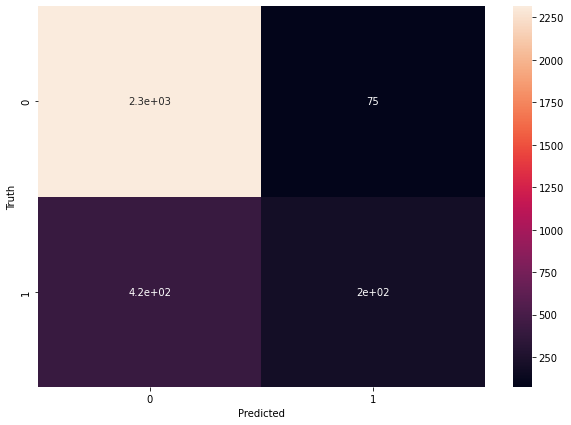

In [57]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      2389
           1       0.72      0.32      0.44       611

    accuracy                           0.84      3000
   macro avg       0.79      0.64      0.67      3000
weighted avg       0.82      0.84      0.81      3000



In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

In [59]:
from sklearn.neural_network import MLPClassifier

In [60]:
model = MLPClassifier(max_iter=100)

In [61]:
model.fit(x_train,y_train)

/Users/tanuj/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=100)

In [62]:
y_pred = model.predict(x_test)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2389
           1       0.71      0.52      0.60       611

    accuracy                           0.86      3000
   macro avg       0.80      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000

